In [105]:
import numpy as np
import matplotlib.pyplot as plt
import time

from qdlutils.hardware.nidaq.synchronous.nidaqsequencer import NidaqSequencer
from qdlutils.hardware.nidaq.synchronous.nidaqsequencerinput import *
from qdlutils.hardware.nidaq.synchronous.nidaqsequenceroutput import *

In [135]:
# Number of samples in the sequence
n_samples = 256

# Rate of samples per second
sample_rate = 128

# Generate the data
data_x = np.arange(0,n_samples) / sample_rate
data_y = 0.5* np.sin(data_x * 2 * np.pi) + 1

In [144]:
outputs = {
    'ao_voltage' : NidaqSequencerAOVoltage(
            name = 'ao_voltage',
            device = 'Dev1',
            channel = 'ao0',
            n_samples = n_samples)
}

data = {
    'ao_voltage' : data_y,
}

In [145]:
inputs = {
    'ai_voltage' : NidaqSequencerAIVoltage(
            name = 'ai_voltage',
            device = 'Dev1',
            channel = 'ai1',
            n_samples = n_samples
    ),
    'ci_edge' : NidaqSequencerCIEdge(
            name = 'ci_edge',
            device = 'Dev1',
            channel = 'ctr2',
            terminal = 'PFI0',
            n_samples = n_samples
    )
}

In [146]:
exp = NidaqSequencer(
        inputs= inputs,
        outputs=outputs,
        clock_device = 'Dev1',
        clock_channel = 'port0'
)

In [147]:
exp.run_sequence(
        data = data,
        sample_rate = sample_rate,
        n_samples = n_samples,
        soft_start = True
)

In [148]:
output_data = exp.outputs['ao_voltage'].data

In [149]:
input_voltage = exp.inputs['ai_voltage'].data
input_counts = exp.inputs['ci_edge'].data

In [150]:
count_rate = np.diff(input_counts, prepend=0) * sample_rate

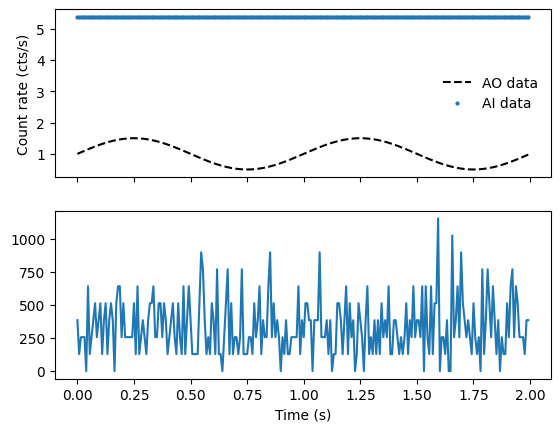

In [151]:
# Plot the results
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(data_x, output_data, 'k--', label='AO data')
ax[0].plot(data_x, input_voltage, 'o', markersize=2, label='AI data')
ax[1].plot(data_x, count_rate, label='count rate')
ax[0].legend(frameon=False)
ax[1].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage (V)')
ax[0].set_ylabel('Count rate (cts/s)')
plt.show()
